# Langkah #5 - Pengujian Hipotesis
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---
### Hipotesis #1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

**Langkah 1: Siapkan hipotesis**
- H0: Perokok memiliki tagihan kesehatan > daripada tagihan non perokok
- H1: Perokok memiliki tagihan kesehatan <= daripada tagihan non perokok
- $\alpha$: 5%

In [3]:
# Tentukan populasinya
# 1. Sampel Tagihan Perokok
jml_perokok = df[df['smoker']=='yes'].value_counts().sum()
print("Jumlah perokok: {} orang".format(jml_perokok))

# 2. Sampel Tagihan non perokok
jml_non_perokok = df[df['smoker']=='no'].value_counts().sum()
print("Jumlah non perokok: {} orang".format(jml_non_perokok))
print("Jumlah keseluruhan sampel: {}".format(df.shape[0]))

# Tentukan rata-rata charges(tagihan) dari kedua sampel
print("\nRata-rata tagihan pada perokok dan non perokok: ")
mu = df[['charges']].groupby(df['smoker']).mean()
print(mu)
mu1 = mu['charges']['no']
mu2 = mu['charges']['yes']

Jumlah perokok: 274 orang
Jumlah non perokok: 1064 orang
Jumlah keseluruhan sampel: 1338

Rata-rata tagihan pada perokok dan non perokok: 
             charges
smoker              
no       8434.268298
yes     32050.231832


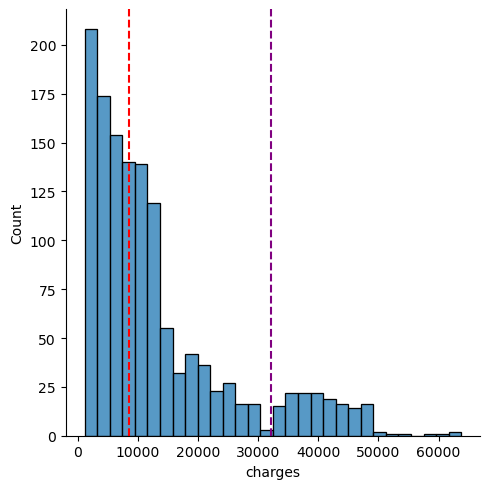

In [4]:
# Plot distribusi charges di seluruh populasi
sns.displot(df, x='charges')
plt.axvline(x=mu1, linestyle='--', c='red', label='mean tagihan non perokok')
plt.axvline(x=mu2, linestyle='--', c='purple', label='mean tagihan perokok')

Berdasarkan grafik di atas terlihat bahwa bentuk distribusi data adalah positive-skew. Maka dari itu kita perlu menormalkan distribusi charges dengan mengeluarkan data outlier dari distribusi. Dari grafik terlihat bahwa outlier dimulai dari data `charges` dengan nilai di atas 15K. 

Jumlah sampel sekarang menjadi: 980
Jumlah sampel baru perokok: 7 orang
Jumlah sampel baru non perokok: 973 orang

Rata-rata tagihan pada perokok dan non perokok: 
             charges
smoker              
no       7062.200064
yes     14063.510214


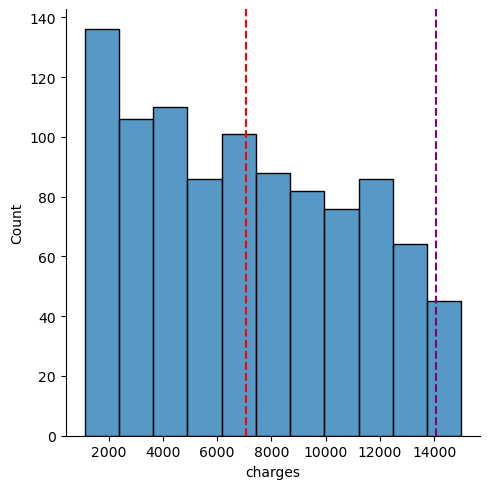

In [5]:
# Filter data tagihan, gunakan tagihan (charges) < 15K
data_charges = df[df['charges']<15000]
print("Jumlah sampel sekarang menjadi: {}".format(data_charges.shape[0]))

# Sampel Baru Tagihan Perokok
jml_perokok = data_charges.where(df['smoker']=='yes').value_counts().sum()
print("Jumlah sampel baru perokok: {} orang".format(jml_perokok))

# Sampel Baru Tagihan non perokok
jml_non_perokok = data_charges.where(df['smoker']=='no').value_counts().sum()
print("Jumlah sampel baru non perokok: {} orang".format(jml_non_perokok))

# Tentukan rata-rata charges(tagihan) dari kedua populasi
print("\nRata-rata tagihan pada perokok dan non perokok: ")
mu = data_charges[['charges']].groupby(df['smoker']).mean()
print(mu)
mu1 = mu['charges']['no']
mu2 = mu['charges']['yes']

sns.displot(data_charges, x='charges')
plt.axvline(x=mu1, linestyle='--', c='red', label='mean tagihan non perokok')
plt.axvline(x=mu2, linestyle='--', c='purple', label='mean tagihan perokok')

In [6]:
# Pisahkan sampel tagihan perokok dengan non-perokok
tagihan_smoker = data_charges['charges'].where(df['smoker']=='yes').dropna()
tagihan_non_smoker = data_charges['charges'].where(df['smoker']=='no').dropna()

**Langkah 2: Hitung Statistik Uji**

Pada kasus ini digunakan statistik Uji T.

**Langkah 3: Menentukan aturan keputusan**

Aturan keputusan didasarkan pada nilai spesifik dari statistik uji (misal, tolak H0 jika Z > 1.645). Karena pada H1 mengandung tanda "<", maka disini dilakukan Lower-tailed test. Dalam uji pihak kiri, aturan keputusan memiliki aturan menolak H0 jika statistik uji lebih kecil dari **nilai kritis**.

**Langkah 4: Menentukan Kritikal Value** 

In [7]:
print("Varian Tagihan Perokok: {}".format(tagihan_smoker.var()))
print("Varian Tagihan non Perokok: {}".format(tagihan_non_smoker.var()))

Varian Tagihan Perokok: 425214.3872213427
Varian Tagihan non Perokok: 14731102.73855582


In [8]:
# Langkah 2 s/d 4 diimplementasikan sekaligus
from scipy.stats import ttest_ind

# Lakukan statistik uji T dan hitung p_value
test_stats, p_value = ttest_ind(a=tagihan_smoker, b=tagihan_non_smoker, equal_var=False, alternative='less')
print("Hasil Uji T: {}".format(test_stats))
print("P-value: {}".format(p_value))

Hasil Uji T: 25.41569223937772
P-value: 0.9999999997042908


**Langkah 5: Membuat Keputusan**

Ada dua bentuk umum yang dapat diambil dari hasil uji hipotesis statistik.
- p-value. 
    - Nilai `P` digunakan dalam pengujian hipotesis untuk membantu memutuskan apakah akan menolak hipotesis nol.
    - Nilai `p-value` adalah bukti terhadap hipotesis nol. Semakin kecil nilai `p-value`, semakin kuat bukti bahwa kita harus menolak hipotesis nol.
- critical value
    - Nilai batas yang digunakan untuk menandai dimulainya suatu wilayah di mana statistik uji, yang diperoleh dalam pengujian hipotesis, tidak mungkin jatuh.
    - Nilai kritis dibandingkan dengan statistik uji yang diperoleh untuk menentukan apakah hipotesis nol harus ditolak atau tidak.
    - Statistik uji < Critical value: Hasil tidak signifikan, gagal menolak H0.
    - Statistik uji >= Critical value: Hasil signifikan, tolak hipotesis H0.

In [9]:
alpha = 0.05
if p_value > alpha:
    print("Gagal tolak H0")
else:
    print("Tolak H0")

Gagal tolak H0


Berdasarkan keputusan yang didapatkan, maka kesimpulan dari pengujian hipotesis yang sudah dilakukan adalah **Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok**.

---
### Hipotesis #4. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

**Hipotesis**
- H0: Tagihan kesehatan dengan BMI di atas 25 > Tagihan kesehatan dengan BMI di bawah 25.
- H1: Tagihan kesehatan dengan BMI di atas 25 < Tagihan kesehatan dengan BMI di bawah 25.
- $\alpha$: 5%

Kasus ini mirip dengan penyelesaian pada Hipotesis #1, di mana kondisi distribusi data tagihan (`charges`) adalah positiven skew. Maka dari itu kita bisa mengabaikan data outlier untuk kemudian masuk ke statistik uji.

Jumlah sampel sekarang menjadi: 980
Jumlah sampel tagihan dengan BMI>25: 793 orang
Jumlah sampel tagihan dengan BMI<=25: 187 orang

Rata-rata tagihan pada BMI>25 dan BMI<=25: 
           charges
bmi               
False  6733.691762
True   7201.468947


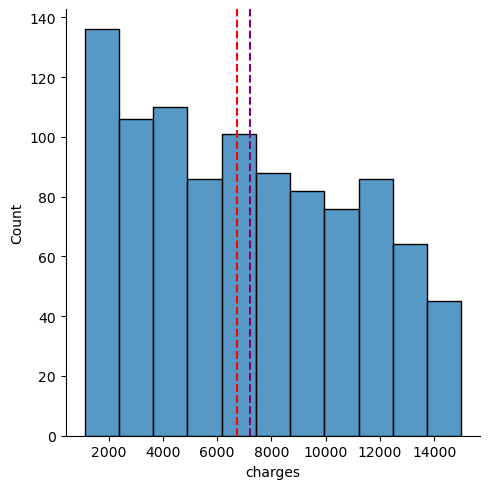

In [10]:
# Filter data tagihan, gunakan tagihan (charges) < 15K
data_charges = df[df['charges']<15000]
print("Jumlah sampel sekarang menjadi: {}".format(data_charges.shape[0]))

# Sampel Baru Tagihan BMI>25
bmi_g25_tagihan = data_charges.where(df['bmi']>25).value_counts().sum()
print("Jumlah sampel tagihan dengan BMI>25: {} orang".format(bmi_g25_tagihan))

# Sampel Baru Tagihan BMI<25
bmi_l25_tagihan = data_charges.where(df['bmi']<=25).value_counts().sum()
print("Jumlah sampel tagihan dengan BMI<=25: {} orang".format(bmi_l25_tagihan))

# Tentukan rata-rata charges(tagihan) dari kedua populasi
print("\nRata-rata tagihan pada BMI>25 dan BMI<=25: ")
mu = data_charges[['charges']].groupby(df['bmi']>25).mean()
print(mu)
mu1 = mu['charges'][0]
mu2 = mu['charges'][1]

sns.displot(data_charges, x='charges')
plt.axvline(x=mu1, linestyle='--', c='red', label='mean tagihan')
plt.axvline(x=mu2, linestyle='--', c='purple', label='mean tagihan')

In [11]:
# Pisahkan sampel tagihan dengan BMI> dan BMI<=25
bmi_g25 = data_charges['charges'].where(df['bmi']>25).dropna()
bmi_l25 = data_charges['charges'].where(df['bmi']<=25).dropna()
print("Varian Tagihan BMI>25: {}".format(bmi_g25.var()))
print("Varian Tagihan BMI<=25: {}".format(bmi_l25.var()))
equal_var = True if bmi_g25.var()==bmi_l25.var() else False
print("Apakah varian kedua sampel sama? {}".format(equal_var))

Varian Tagihan BMI>25: 14659959.63403945
Varian Tagihan BMI<=25: 16226139.93278577
Apakah varian kedua sampel sama? False


**Lakukan Statistik Uji T dan Hitung p_value**

In [12]:
alpha = 0.05
test_stats, p_value = ttest_ind(a=bmi_g25, b=bmi_l25, equal_var=equal_var, alternative='less')
print("Hasil Uji T: {}".format(test_stats))
print("P-value: {}".format(p_value))

if p_value > alpha:
    print("Gagal tolak H0")
else:
    print("Tolak H0")

Hasil Uji T: 1.4418247938478395
P-value: 0.9247463946839116
Gagal tolak H0


Berdasarkan keputusan yang didapatkan, maka kesimpulan dari pengujian hipotesis yang sudah dilakukan adalah **Tagihan kesehatan orang dengan BMI lebih tinggi dari 25 lebih besar daripada orang yang BMI-nya di bawah 25**.

---
### Hipotesis #5. Tagihan kesehatan laki-laki lebih besar dari perempuan

Hal yang serupa bisa kita lakukan untuk Hipotesis 5.

- H0: Tagihan kesehatan laki-laki > tagihan kesehatan perempuan
- H1: Tagihan kesehatan laki-laki <= tagihan kesehatan perempuan
- $\alpha$: 5%

Jumlah sampel sekarang menjadi: 980
Jumlah sampel tagihan pada gender laki-laki: 477 orang
Jumlah sampel tagihan pada gender perempuan: 503 orang

Rata-rata Tagihan pada Laki-laki dan Perempuan: 
            charges
sex                
female  7412.722165
male    6795.316531


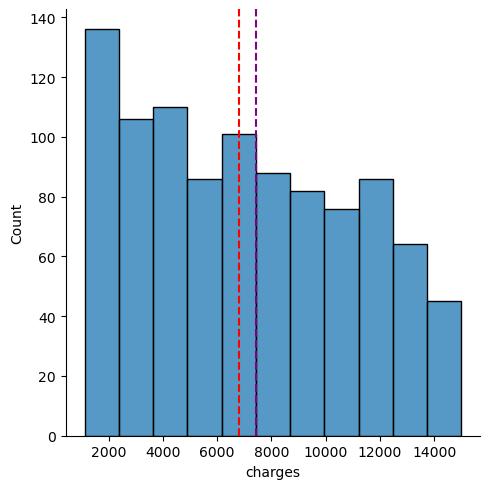

In [13]:
# Filter data tagihan, gunakan tagihan (charges) < 15K
data_charges = df[df['charges']<15000]
print("Jumlah sampel sekarang menjadi: {}".format(data_charges.shape[0]))

# Sampel Baru Tagihan Laki-laki
tagihan_laki = data_charges.where(df['sex']=='male').value_counts().sum()
print("Jumlah sampel tagihan pada gender laki-laki: {} orang".format(tagihan_laki))

# Sampel Baru Tagihan Perempuan
tagihan_perempuan = data_charges.where(df['sex']=='female').value_counts().sum()
print("Jumlah sampel tagihan pada gender perempuan: {} orang".format(tagihan_perempuan))

# Tentukan rata-rata charges(tagihan) dari kedua sampel
print("\nRata-rata Tagihan pada Laki-laki dan Perempuan: ")
mu = data_charges[['charges']].groupby(df['sex']).mean()
print(mu)
mu1 = mu['charges']['male']
mu2 = mu['charges']['female']

sns.displot(data_charges, x='charges')
plt.axvline(x=mu1, linestyle='--', c='red', label='mean tagihan')
plt.axvline(x=mu2, linestyle='--', c='purple', label='mean tagihan')

In [14]:
# Pisahkan sampel tagihan pada gender laki-laki dan perempuan
male = data_charges['charges'].where(df['sex']=='male').dropna()
female = data_charges['charges'].where(df['sex']=='female').dropna()
print("Varian Tagihan Laki-laki: {}".format(male.var()))
print("Varian Tagihan Perempuan: {}".format(female.var()))
equal_var = True if male.var()==female.var() else False
print("Apakah varian kedua sampel sama? {}".format(equal_var))

Varian Tagihan Laki-laki: 14837873.420394791
Varian Tagihan Perempuan: 14951607.858448775
Apakah varian kedua sampel sama? False


In [15]:
# Uji statistik T dan P_value
alpha = 0.05
test_stats, p_value = ttest_ind(a=male, b=female, equal_var=equal_var, alternative='less')
print("Hasil Uji T: {}".format(test_stats))
print("P-value: {}".format(p_value))

if p_value > alpha:
    print("Gagal tolak H0")
else:
    print("Tolak H0")

Hasil Uji T: -2.5032617062621183
P-value: 0.006233964666790543
Tolak H0


Berdasarkan keputusan yang didapatkan, maka kesimpulan dari pengujian hipotesis yang sudah dilakukan adalah **Tagihan kesehatan laki-laki tidak lebih besar daripada tagihan kesehatan perempuan**.